## Projeto de Predição e Classificação de Tumores para Tratamento do Cancer

O seguinte projeto consiste no projeto final do curso de Machine Learning da Formação
Cientista de Dados da Data Science Academy, retirado de uma competição do Kaggle.

Nos últimos ano, com os avanços da computação e do aprendizado de máquina, a medicina de precisão tem sido uma importante ferramente para revolucionar o tratamento de doenças complexas como o câncer. No entanto, esse avanço tem sido limitado pelo volume significativo de trabalho manual ainda necessário. O Memorial Sloan Kettering Cancer Center (MSKCC) reconheceu essa limitação e lançou um desafio no Kaggle com o objetivo de impulsionar a medicina personalizada. 

Um tumor cancerígeno é uma massa de tecido formada por células anormais, geradas a partir de mutações genéticas, que crescem de maneira descontrolada. O desafio central é identificar quais dessas mutações genéticas contribuem para o crescimento do tumor e quais são mutações neutras. Atualmente, essa tarefa é realizada manualmente por patologistas clínicos, que revisam e classificam cada mutação com base em evidências da literatura clínica em texto. Este processo demanda uma quantidade significativa de profissionais da área, além de ser extremamente demorado e suscetível a erros humanos.

Para esta competição, o MSKCC disponibilizou uma base de evidências textuais escritas por especialistas, onde renomados pesquisadores e oncologistas classificaram manualmente milhares de mutações. Este projeto visa desenvolver um algoritmo de aprendizado de máquina que, utilizando essa base de conhecimento, possa automaticamente classificar variações genéticas, aliviando a carga de trabalho manual e aumentando a precisão e eficiência do diagnóstico, ação indispensavel para o tratamento precoce e assim potencializar as chances de sucesso do tratamento.

Neste contexto, no projeto abaixo será feita uma análise dos dados disponíveis bem como a contrução de um classificador de cânceres com base em dados textuais, utilizando da linguagem Python, buscando explorar e implementar soluções de aprendizado de máquina que possam automatizar esse processo de classificação. Python é uma linguagem bastante flexível e possui vastas e excelentes bibliotecas voltadas para manipulação de dados, processamento de linguagem natural (PLN) e aprendizado de máquina. 

Com este projeto, espero consolidar meus conhecimentos obtidos no curso de Machine Learning da Data Science Academy além de contribuir para área da medicina personalizada.



Referências do Projeto: 
 - Projeto Base: https://www.kaggle.com/code/edaaydinea/prediction-medicine-redefining-cancer-treatment
 - Visão Geral da Competição: https://www.kaggle.com/competitions/msk-redefining-cancer-treatment/overview
 - Memorial Sloan Kettering Cancer Center (MSKCC): https://www.mskcc.org
 
Referências Teórica:
 - Curso Fundamentos de Python Para Análise de Dados (DSA): https://www.datascienceacademy.com.br/course/fundamentos-de-linguagem-python-para-analise-de-dados-e-data-science
 - Curso Machine Learning (DSA): https://www.datascienceacademy.com.br/course/machine-learning-engineer

Documentação das Bibliotecas Utilizadas:
 - Pandas: https://pandas.pydata.org/docs
 - Scikit Learn: https://scikit-learn.org/stable
 - Numpy: https://numpy.org/doc
 - Matplotlib: https://matplotlib.org
 - Seaborn: https://seaborn.pydata.org
 - Spacy: https://spacy.io/api/doc
 - NLTK: https://www.nltk.org
 

## 0 - Baixe os Arquivos de Dados
Baixe e extraia o arquivo data_file.zip disponível em https://drive.google.com/file/d/1saopwMrcGZ7vlMmzupfuQ_zERBWGVjql/view?usp=sharing

## 1 - Importando pacotes

In [44]:
# imports
import pandas as pd # manipulação, análise de dados e trabalhar com dataframes
import numpy as np # matemática e dados multidimensionais
import matplotlib.pyplot as plt # plotagem
import seaborn as sns # plotagem
import nltk # pln
import spacy # pln
import re # expressões regulares
import string # operações de strings
import sklearn # aprendizado de máquina
from sklearn.model_selection import train_test_split # divisão de dados de treino e teste
from sklearn.metrics import confusion_matrix # construção da matriz de confusão
from sklearn.metrics._classification import accuracy_score, log_loss # cálculo da acurácia e da perda logarítmica
from sklearn.feature_extraction.text import CountVectorizer # matriz de contagem de tokens
from sklearn.preprocessing import normalize # normalização
from sklearn.calibration import CalibratedClassifierCV # calibra probabilidades preditivas
from sklearn.base import clone # clona um modelos
from collections import defaultdict # contagem e dicionário
import warnings # filtrar aletas
import math # matemática
# modelos
from sklearn.linear_model import SGDClassifier # classificador gradiente descendente
from sklearn.linear_model import LogisticRegression # regressão logística
from sklearn.svm import SVC # SVM
from sklearn.neural_network import MLPClassifier #MLP
from sklearn.ensemble import RandomForestClassifier # classificador RF
from sklearn.naive_bayes import MultinomialNB # naive bayes multinomial
from sklearn.neighbors import KNeighborsClassifier # classificador KNN
from scipy.sparse import hstack # pilha horizontal de matrizes
# não exibir alertas
warnings.filterwarnings("ignore")

In [45]:
# versões das bibliotecas
%reload_ext watermark
%watermark --iversions

numpy     : 1.23.5
seaborn   : 0.12.2
re        : 2.2.1
pandas    : 2.0.2
spacy     : 3.7.2
sklearn   : 1.2.1
nltk      : 3.6.1
matplotlib: 3.7.1



## 2 - Carregando os dados

In [297]:
# variantes
training_variants = pd.read_csv("./data_files/training_variants.csv")
# textos
training_text = pd.read_csv("./data_files/training_text", sep = "\|\|", engine= "python",names= ["ID","Text"], skiprows = 1)

# unir variantes e textos em um dataframe
train_data = pd.merge(training_variants,training_text,on="ID")

## 3 - Análise Exploratória e Pré-processamento dos dados

In [298]:
# exibindo dados de treino
print(train_data.shape)
train_data.head()

(3321, 5)


,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [299]:
# checando se existem valores ausentes
print("Valores ausentes nos dados de treino:")
print(train_data.isna().sum())

Valores ausentes nos dados de treino:
ID           0
Gene         0
Variation    0
Class        0
Text         5
dtype: int64


In [300]:
# removendo valores ausentes
train_data = train_data.dropna().reset_index(drop=True)
print("Valores ausentes nos dados de treino:")
print(train_data.isna().sum())

Valores ausentes nos dados de treino:
ID           0
Gene         0
Variation    0
Class        0
Text         0
dtype: int64


In [301]:
# stopwords da lingua inglesa
# para baixar as stopwords: nltk.download("stopwords")
en_stopwords = set(nltk.corpus.stopwords.words('english'))

# lematização - reduz palavras flexionadas a sua forma base
def lemmatizer(text):
    # removendo pontuação
    regex = re.compile('['+re.escape(string.punctuation)+'\\r\\t\\n]')
    nopunct = regex.sub(" ",str(text))
    # lematização
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(nopunct, disable=['parser','ner'])
    lemma = [token.lemma_ for token in doc]
    return lemma

# pre processamento do texto
def preprocess_text(text):
    # lematização
    text_lemmatizerd = lemmatizer(text)
    # remover stopwords, caracteres não ascii e espaços em branco
    filtered_text = [word.lower() for word in text_lemmatizerd if (word not in en_stopwords and not word.isspace() and word.isascii())]
    # unir palavras em texto
    return ' '.join(filtered_text)

## <span style="color:orange">Atenção, Não é necessário executar a célula abaixo!</span> 
O pré-processamento dos dados leva cerca de uma hora e os dados processados já esta disponível em <span style="color:blue">./data_files/processed_training_text.csv</span>. 

In [ ]:
print("Pré Processamento dos textos de treino.")
train_processed = train_data.iloc[:,:4]
train_processed['Processed_Text'] = train_data['Text'].apply(preprocess_text)
train_processed[["ID","Processed_Text"]].to_csv('./data_files/processed_training_text.csv', index=False, sep=',', encoding='utf-8', header=True)
print("Pré Processamento concluído com sucesso!")

In [302]:
# remover coluna de texto não processado
train_result = train_data.iloc[:,1:4]
# carregando novamente os dados pre-processados
train_result["Processed_Text"] = pd.read_csv('./data_files/processed_training_text.csv')["Processed_Text"]
print("Valores ausentes nos dados de treino:")
print(train_result.isna().sum())

Valores ausentes nos dados de treino:
Gene              0
Variation         0
Class             0
Processed_Text    0
dtype: int64


In [303]:
train_result

,Gene,Variation,Class,Processed_Text
0,FAM58A,Truncating Mutations,1,cyclin dependent kinase cdk regulate variety f...
1,CBL,W802*,2,abstract background non small cell lung cancer...
2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,CBL,N454D,3,recent evidence demonstrate acquire uniparenta...
4,CBL,L399V,4,oncogenic mutation monomeric casitas b lineage...
...,...,...,...,...
3311,RUNX1,D171N,4,introduction myelodysplastic syndrome mds hete...
3312,RUNX1,A122*,1,introduction myelodysplastic syndrome mds hete...
3313,RUNX1,Fusions,1,runt relate transcription factor 1 gene runx1 ...
3314,RUNX1,R80C,4,runx1 aml1 gene frequent target chromosomal tr...


In [304]:
# pré processamento dos genes e das variantes 
# substituir espaços em branco por underline
train_result["Gene"] = train_result["Gene"].str.replace("\s+", "_")
train_result["Variation"] = train_result["Variation"].str.replace("\s+", "_")

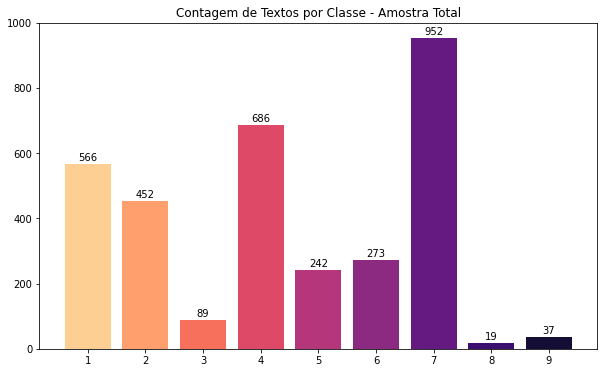

In [305]:
# plotagem da contagem de textos por classe
train_count = train_result["Class"].value_counts().sort_index()
colors = sns.color_palette("magma_r", 9)
plt.figure(figsize=(10, 6))
plt.title("Contagem de Textos por Classe - Amostra Total")
bars = plt.bar(train_count.index, train_count.values,color = colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, yval, ha='center', va='bottom')
plt.xticks(np.arange(len(train_count.index))+1, train_count.index)
plt.ylim(0,1000)
plt.show()

In [346]:
# organização das entradas do modelo
y = train_result["Class"].values
# divisão dos dados de treino e teste
X_train, test_df, y_train, y_test = train_test_split(train_result, y, stratify=y, test_size=0.4)
# divisão dos dados de treino e validação
train_df, val_df, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1)

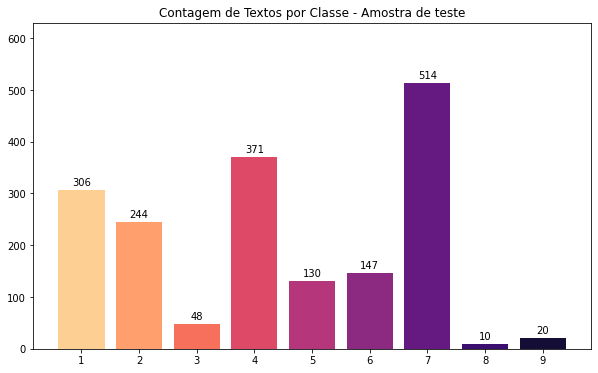

In [421]:
# plotagem da contagem de textos por classe
train_count = train_df["Class"].value_counts().sort_index()
colors = sns.color_palette("magma_r", 9)
plt.figure(figsize=(10, 6))
plt.title("Contagem de Textos por Classe - Amostra de teste")
bars = plt.bar(train_count.index, train_count.values,color = colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, yval, ha='center', va='bottom')
plt.xticks(np.arange(len(train_count.index))+1, train_count.index)
plt.ylim(0,630)
plt.show()

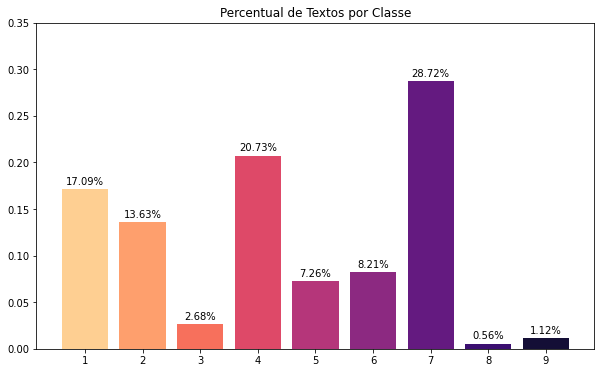

In [348]:
# plotagem do percentual de textos por classe
total = train_df["Class"].value_counts().sum()
train_percent = train_df["Class"].value_counts().sort_index()/total
colors = sns.color_palette("magma_r", 9)
plt.figure(figsize=(10, 6))
plt.title("Percentual de Textos por Classe")
bars = plt.bar(train_count.index, train_percent,color = colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(round(bar.get_x(),2) + bar.get_width()/2,yval+0.003, str(round(yval*100,2))+"%", ha='center', va='bottom')
plt.xticks(np.arange(len(train_count.index))+1, train_count.index)
plt.ylim(0,0.35)
plt.show()

### Observação sobre os dados:
Ao analisar a distribuição dos dados, é evidente a desproporcionalidade no número de exemplos entre as diferentes classes, com destaque para as classes 3, 8 e 9, que possuem uma quantidade significativamente menor de amostras. Essa desigualdade representa um grande desafio para o modelo, pois o desequilíbrio entre as classes tende a afetar diretamente sua capacidade de realizar previsões com alta acurácia. A predominância de determinadas classes pode levar o modelo a desenvolver um viés durante o treinamento, favorecendo as classes mais representadas em detrimento das demais.

## 4.1 - Aplicando One hot e Response Encoding nas Colunas de Genes e Variantes

# One-Hot Encoding:
    É uma técnica de codificação que transforma dados categóricos (como palavras ou classes) em vetores binários. No contexto de PLN, é útil para converter palavras em uma representação numérica compreensível para algoritmos de aprendizado de máquina.
# Response Encoding
    É uma técnica que associa a uma variável categórica o valor médio de um alvo contínuo ou categórico com base na variável de saída que se deseja prever. Ela codifica uma variável categórica de acordo com a relação entre a variável e a resposta prevista, funcionando muito bem em modelos probabilísticos. Em PLN, é ser útil para capturar informações mais ricas sobre o comportamento das palavras em relação ao resultado que você está tentando prever.

In [349]:
print(f"Número de genes únicos : {len(train_df.Gene.unique())} de {len(train_df.Gene)}")
print(f"Número de variantes únicas : {len(train_df.Variation.unique())} de {len(train_df.Variation)}")

Número de genes únicos : 224 de 1790
Número de variantes únicas : 1629 de 1790


In [350]:
vectorizer = CountVectorizer()
# convertendo dados de treino em uma matriz de contagem
train_gene_onehot = vectorizer.fit_transform(train_df["Gene"])
#convertendo dados de teste e validação em uma matriz de contagem no mesmo formato dos dados de treino
test_gene_onehot = vectorizer.transform(test_df["Gene"])
val_gene_onehot = vectorizer.transform(val_df["Gene"])

vectorizer = CountVectorizer()
# convertendo dados de treino em uma matriz de contagem
train_variation_onehot = vectorizer.fit_transform(train_df['Variation'])
#convertendo dados de teste e validação em uma matriz de contagem no mesmo formato dos dados de treino
test_variation_onehot = vectorizer.transform(test_df['Variation'])
val_variation_onehot = vectorizer.transform(val_df['Variation'])

In [351]:
# construção de um dicionário com a probabilidade de cada palavra pertencer a cada classe
# alpha: parametro para a suavização de laplace
# feature: coluna do dataframe
def prob_each_class_dict(alpha, feature):
    # contagem dos elementos únicos
    value_count = train_df[feature].value_counts()
    probs_dict = dict()
    for word, freq in value_count.items():
        # vetor de probabilidade para cada palavra
        prob_vec = []
        for c in range(1,10):
            # contagem da frequência de cada palavra para cada classe
            freq_class = train_df.loc[(train_df['Class']== c) & (train_df[feature]==word)].shape[0]
            # calcular probabilidade aplicando suavização de laplace com o parâmetro alpha
            prob_vec.append((freq_class + alpha*10)/ (freq + 90*alpha))
        probs_dict[word]=prob_vec
    return probs_dict

# Get Gene variation feature
def prob_each_class(alpha, feature, df):
    # obter probabilidades de cada palavra pertencer a cada classe
    prob_dict = prob_each_class_dict(alpha, feature)
    # contagem dos elementos únicos
    value_count = train_df[feature].value_counts()
    probs = []
    # percorrer cada linha do dataframe em comparação
    n_classes = len(list(prob_each_class_dict(alpha, "Gene").values())[0])
    for index,row in df.iterrows():
        # se a palavra estiver no dicinário de probabilidades
        if row[feature] in dict(value_count).keys():
            # importar probabilidade
            probs.append(prob_dict[row[feature]])
        else:
            # se não por probabilidade média para cada classe
            probs.append([1/n_classes for x in range(n_classes)])
    return probs

In [352]:
# aplicando response encoding em Gene e Variation
alpha = 1
train_gene_response = np.array(prob_each_class(alpha, "Gene", train_df))
test_gene_response = np.array(prob_each_class(alpha, "Gene", test_df))
val_gene_response = np.array(prob_each_class(alpha, "Gene", val_df))

train_variation_response = np.array(prob_each_class(alpha, "Variation", train_df))
test_variation_response = np.array(prob_each_class(alpha, "Variation", test_df))
val_variation_response = np.array(prob_each_class(alpha, "Variation", val_df))

## 4.2 - Aplicando One hot e Response Encoding a Processed_Text

In [353]:
# one hot enconding 
# contagem de palavras com mais de 3 ocorrências
min_occorrence = 3
text_vectorizer = CountVectorizer(min_df=min_occorrence)
train_text_onehot = text_vectorizer.fit_transform(train_df["Processed_Text"])
test_text_onehot = text_vectorizer.transform(test_df["Processed_Text"])
val_text_onehot = text_vectorizer.transform(val_df["Processed_Text"])

# obtendo palavras únicas
unique_words= text_vectorizer.get_feature_names_out()

print(f"Numero total de palavras únicas nos dados de treino: {len(unique_words)}")

Numero total de palavras únicas nos dados de treino: 45340


In [354]:
# retorna o percentual palavras comuns ao df e ao dataframe de treino
def intersec_text(df):
    # contagem de palavras com mais de 3 ocorrências
    df_text_vec = CountVectorizer(min_df=min_occorrence)
    df_text_vec.fit_transform(df["Processed_Text"])
    df_unique_words = df_text_vec.get_feature_names_out()
    
    # Calcula o número de características únicas no DataFrame 'df'
    total_len = len(set(df_unique_words))
    # Calcula o número de características que são comuns entre 'df' e 'train_text_features'
    intersec_len = len(set(unique_words) & set(df_unique_words))
    return (intersec_len/total_len)*100

In [355]:
# panorama geral dos dados de validação e teste em relação aos dados de treino
train_intersec_test = intersec_text(test_df)
print(f"{np.round(train_intersec_test, 2)}% das palavras em teste estão presentes nos dados de treino")
train_intersec_val = intersec_text(val_df)
print(f"{np.round(train_intersec_val, 2)}% das palavras em validação estão presentes nos dados de treino")

88.64% das palavras em teste estão presentes nos dados de treino
99.18% das palavras em validação estão presentes nos dados de treino


In [356]:
# normalização dos textos com one hot enconding
train_text_onehot = normalize(train_text_onehot, axis=0)
test_text_onehot = normalize(test_text_onehot, axis=0)
val_text_onehot = normalize(val_text_onehot, axis=0)

In [357]:
# cria um dicionário que conta a frequência de cada palavra em um conjunto de textos
def freq_dict(texts):
    freq_dict_ = defaultdict(int)
    for idx, row in texts.iterrows():
        for word in row["Processed_Text"].split():
            freq_dict_[word] +=1
    return freq_dict_

In [358]:
# provavelmente vou remover essa célula e a de cima
# lista de dicionários da contagem de palavras para cada classe
freq_dict_list = []
for i in range(1,10):
    df_class_i = train_df[train_df['Class']==i]
    freq_dict_list.append(freq_dict(df_class_i))

# dicionário da contagem de palavras total
total_dict = freq_dict(train_df)

confuse_array = []
for i in unique_words:
    ratios = []
    max_val = -1
    for j in range(0,9):
        # probabilidade = frequência da palavra na classe pela frequência total da palavra aplicando suavização de laplace
        ratios.append((freq_dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
# probabilidade de cada palavra única pertencer a cada classe
confuse_array = np.array(confuse_array)

In [359]:
# aplica response encoding aos textos
def text_response(df):
    # probabilidade de cada texto pertencer a cada classe
    df_text_response= np.zeros((df.shape[0],9))
    # para cada classe
    for i in range(0,9):
        row_index = 0
        # para cada texto no data frame
        for index, row in df.iterrows():
            sum_prob = 0
            # somatório das probabilidade aplicando suavização de laplace
            for word in row["Processed_Text"].split():
                # frequência da palavra na classe / frequência total da palavra
                # suavização de laplace
                # aplicar log para evitar underflow 
                sum_prob += math.log(((freq_dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            # reverter log e atualizar a matriz com a média da soma das probabilidades
            df_text_response[row_index][i] = math.exp(sum_prob/len(row["Processed_Text"].split()))
            row_index += 1
    return df_text_response

In [360]:
# aplicando response encoding os textos
train_text_response  = text_response(train_df)
test_text_response  = text_response(test_df)
val_text_response  = text_response(val_df)

# normalização: garante que a soma das probabilidades de cada linha da matriz seja igual a 1
# trasposição da matriz resultante da divisão da matriz transposta pela matriz da soma dos elementos de cada linha
train_text_response = (train_text_response.T/train_text_response.sum(axis=1)).T
test_text_fresponse = (test_text_response.T/test_text_response.sum(axis=1)).T
val_text_response = (val_text_response.T/val_text_response.sum(axis=1)).T

## 5 - Preparação dos dados

In [361]:
# preparação dos dados para o treinamento
# união dos características
# no one hot enconding é feita a conversão das matrizes em linhas esparsas compactadas

# x treino com onehot
train_x_onehot = hstack((train_gene_onehot,train_variation_onehot))
train_x_onehot = hstack((train_x_onehot, train_text_onehot)).tocsr()
# x treino com response
train_x_response = np.hstack((train_gene_response,train_variation_response))
train_x_response = np.hstack((train_x_response, train_text_response))
# y treino
train_y = np.array(list(train_df['Class']))

# x teste com onehot
test_x_onehot = hstack((test_gene_onehot,test_variation_onehot))
test_x_onehot = hstack((test_x_onehot, test_text_onehot)).tocsr()
# x teste com response
test_x_response = np.hstack((test_gene_response,test_variation_response))
test_x_response = np.hstack((test_x_response, test_text_response))
# y teste
test_y = np.array(list(test_df['Class']))

# x validação com onehot
val_x_onehot = hstack((val_gene_onehot,val_variation_onehot))
val_x_onehot = hstack((val_x_onehot, val_text_onehot)).tocsr()
# x validação com response
val_x_response = np.hstack((val_gene_response,val_variation_response))
val_x_response = np.hstack((val_x_response, val_text_response))
#y validação
val_y = np.array(list(val_df['Class']))

## 6 -  Construindo Gerenciador 
Objetivo dessa etapa é desenvolver uma classe que seja capaz de gerenciar os modelos e generalizar sua aplicação nos diferentes conjuntos de dados. A criação dessa estrutura permite melhor controle sobre os modelos, facilitando a automação dos processos de treinamento, avaliação e ajuste de parâmetros.

Além disso, uma parte importante dessa fase será o armazenamento dos modelos após o treinamento. Isso permitirá não apenas a comparação direta dos resultados entre os diferentes modelos, mas também a possibilidade de reutilizar ou ajustar esses modelos em iterações futuras, sem precisar iniciar o processo de modelagem do zero.

Essa abordagem orientada a objeto visa maior qualidade, eficiência e organização do ciclo de desenvolvimento e oferecer uma visão clara das diferenças de desempenho entre os modelos aplicados.

In [398]:
# dicionário para armazenar os resultados dos modelos
models_dict = {}
# contruindo classe para gerenciar os classificadores
class Classifier_Menager():
    
    # método construtor
    def __init__(self,xy_train,xy_test,xy_val):
        # dados
        self.data = {"train":xy_train,"test":xy_test,"val":xy_val}
        self.pred_data = {k:None for k in list(self.data.keys())}
        # modelo
        self.model = None
        self.accuracy = {k:0 for k in list(self.data.keys())}
        self.log_loss = {k:0 for k in list(self.data.keys())}
    
    # adicionar modleo
    def new_model(self,model):
        self.pred_data = {k:None for k in list(self.data.keys())}
        self.model = model
        self.accuracy = {k:0 for k in list(self.data.keys())}
        self.log_loss = {k:0 for k in list(self.data.keys())}
    
    # editar parâmetros do modelo
    def set_params(self,param_dict):
        temp = clone(self.model)
        temp.set_params(**param_dict)
        self.new_model(temp)
    
    # editar parâmetro do modelo a martir da eleição do melhor valor em uma lista para uma mética (log_loss ou accuracy)
    def set_best_param(self, param_name, param_values,metric = "log_loss"):
        # criar listas para armazenar métricas
        log_errors = []
        accs = []
        # dados de treino e validação
        x_train,y_train= self.data["train"][0],self.data["train"][1]
        x_val,y_val= self.data["val"][0],self.data["val"][1]

        # treinar modelo com diferentes valores para o parâmetro
        for a in param_values:
            clf = clone(self.model)
            # modificação do parâmetro do modelo
            clf.set_params(**{param_name:a})
            
            # treinamento
            clf.fit(x_train,y_train)
            
            # calibrar o modelo
            calib_clf = CalibratedClassifierCV(clf)
            calib_clf.fit(x_train,y_train)
            
            # prever probabilidades para os dados de validação
            val_probs = calib_clf.predict_proba(x_val)

            # calcular a perda logarítmica e adicionar a lista
            val_log_loss = log_loss(y_val, val_probs, labels=clf.classes_, eps=1e-15)
            log_errors.append(val_log_loss)
            
            # calcular a acurácia e adicionar a lista
            y_pred = calib_clf.predict(x_val)
            val_acc = accuracy_score(y_val, y_pred)
            accs.append(val_acc)
            # imprimir métricas
            print(f"{param_name} = {a} ------> Perda Logarítmica = {round(val_log_loss,4)}       Accuracy = {round(val_acc,4)}\n")

        #definindo métrica de desempenho
        if metric == "accuracy":
            idx = np.argmax(accs)
        if metric == "log_loss":
            idx = np.argmin(log_errors)
        else:
            idx = np.argmax(accs)
            
        # escolha do melhor parâmetro
        best_param = param_values[idx]
        loss = log_errors[idx]
        acc = accs[idx]
        print("_"*50)
        print(f"\nMelhor {param_name} para a métrica '{metric}'= {best_param}")
        print(f"\tPerda Logarítmica = {round(loss,4)}")
        print(f"\tAcurácia = {round(acc,4)}")
        self.set_params({param_name:best_param})
    
    # treinar modelo com os dados de treino
    def fit(self):
        x_train,y_train= self.data["train"][0],self.data["train"][1]
        clf = clone(self.model.fit(x_train, y_train))
        calib_clf = CalibratedClassifierCV(clf)
        self.model = calib_clf.fit(x_train, y_train)
    
    # calcular a acurácia por classe
    def accuracy_per_class(self,data = "test"):
        y_test= self.data[data][1]
        y_pred= self.pred_data[data]
        C = confusion_matrix(y_test, y_pred)
        P = C.astype('float') / C.sum(axis=1)[:, np.newaxis]
        accs = {i+1:round(P[i][i],4) for i in range(P.shape[0])}
        return accs
    
    # realizar previsões
    def predict(self,data_name="test"):
        x_test,y_test= self.data[data_name][0],self.data[data_name][1]

        clf = self.model
        pred_y = clf.predict(x_test)
        # calculo da perda e acurácia
        self.log_loss[data_name] = log_loss(y_test, clf.predict_proba(x_test), labels=clf.classes_, eps=1e-15)
        self.accuracy[data_name] = accuracy_score(y_test, pred_y)
        self.pred_data[data_name] = pred_y

        print(f"Previsões do Modelo em {data_name}:")
        print(f"\tPerda Logarítmica = {round(self.log_loss[data_name],4)}")
        print(f"\tAcurácia = {round(self.accuracy[data_name],4)}")        
    
    # realizar previsões com todas as partições dos dados disponíveis
    def predict_all(self):
        for i in list(self.data.keys()):
            self.predict(i)

    # salvar informações do modelo para análise
    def save_model(self, name):
        class_accuracy = self.accuracy_per_class("test")
        accuracy = self.accuracy["test"]
        log_losses = self.log_loss["test"]
        global models_dict
        models_dict[name] = [accuracy, class_accuracy,log_losses]

    # realizar previsões e plotagem dos gráficos
    def plot(self,data_name="test"):
        y_test= self.data[data_name][1]
        y_pred= self.pred_data[data_name]
        labels = list(range(1,10))
        C = confusion_matrix(y_test, y_pred)
        P = C.astype('float') / C.sum(axis=1)[:, np.newaxis]
        fig, ax = plt.subplots(1, 2, figsize=(18, 8)) 

        sns.heatmap(C, annot=True, cmap="YlGnBu", fmt="d", xticklabels=labels, yticklabels=labels,ax=ax[0])
        ax[0].set_title(f"Matriz de confusão - {data_name}")
        ax[0].set_xlabel('Classe Prevista')
        ax[0].set_ylabel('Classe Original')

        sns.heatmap(P,annot=True,  cmap="magma_r", fmt=".3f", xticklabels=labels, yticklabels=labels,ax=ax[1])
        ax[1].set_title(f"Matriz de Precisão - {data_name}")
        ax[1].set_xlabel('Classe Prevista')
        ax[1].set_ylabel('Classe Original')
        plt.tight_layout()
        plt.show()


In [399]:
# criar gerenciador de classificador para dados onehot
cm_onehot = Classifier_Menager([train_x_onehot,train_y],[test_x_onehot,test_y],[val_x_onehot,val_y])
# criar gerenciador de classificador para dados response
cm_response = Classifier_Menager([train_x_response,train_y],[test_x_response,test_y],[val_x_response,val_y])

## 7 - Treinamento dos Modelos

### 7.1 - Naive Bayes

In [400]:
# adicionando modelo
cm_onehot.new_model(MultinomialNB())
# buscar melhor valor de alpha
alpha = [10**x for x in range(-6,0)]
cm_onehot.set_best_param("alpha",alpha)
# treinamento
cm_onehot.fit()

alpha = 1e-06 ------> Perda Logarítmica = 1.2797       Accuracy = 0.5779

alpha = 1e-05 ------> Perda Logarítmica = 1.2777       Accuracy = 0.593

alpha = 0.0001 ------> Perda Logarítmica = 1.2748       Accuracy = 0.593

alpha = 0.001 ------> Perda Logarítmica = 1.2565       Accuracy = 0.5879

alpha = 0.01 ------> Perda Logarítmica = 1.2618       Accuracy = 0.5829

alpha = 0.1 ------> Perda Logarítmica = 1.278       Accuracy = 0.5879

__________________________________________________

Melhor alpha para a métrica 'log_loss'= 0.001
	Perda Logarítmica = 1.2565
	Acurácia = 0.5879


Previsões do Modelo em train:
	Perda Logarítmica = 0.8304
	Acurácia = 0.8503
Previsões do Modelo em test:
	Perda Logarítmica = 1.243
	Acurácia = 0.624
Previsões do Modelo em val:
	Perda Logarítmica = 1.2565
	Acurácia = 0.5879


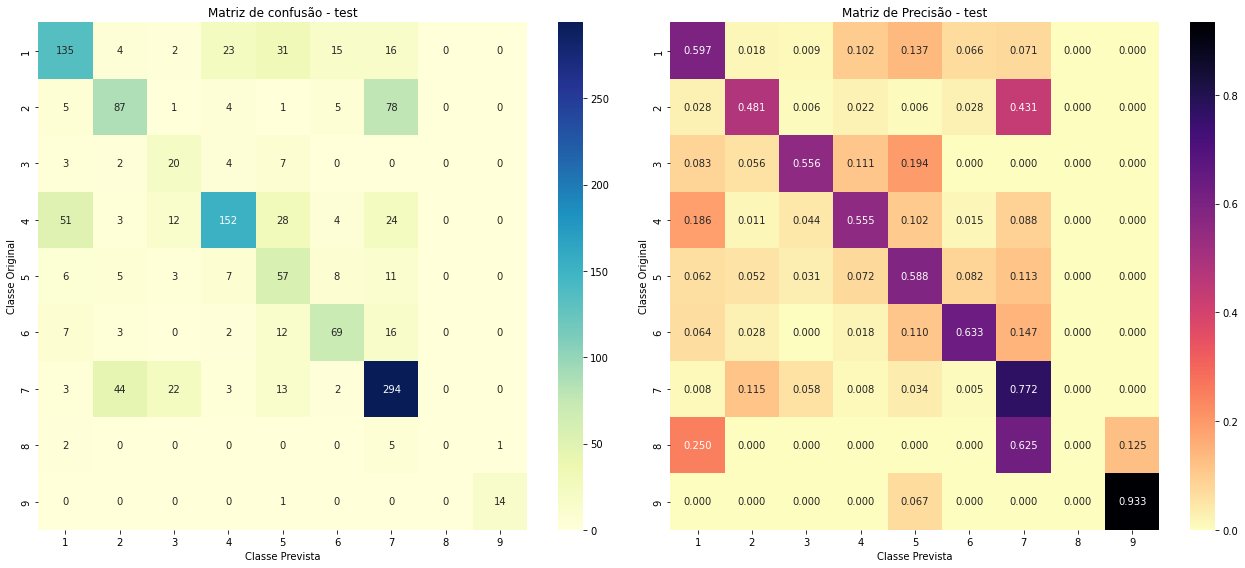

In [401]:
# previsão com todas as amostras de dados
cm_onehot.predict_all()
# plotagem da matriz de confusão e precisão do modelo nos dados de treino
cm_onehot.plot()
cm_onehot.save_model("Naive Bayes")

### 7.2 - K-Nearest Neighbors (KNN)

In [402]:
cm_response.new_model(KNeighborsClassifier())
k = [4*i+1 for i in range(5)]
cm_response.set_best_param("n_neighbors",k)
cm_response.fit()

n_neighbors = 1 ------> Perda Logarítmica = 1.3502       Accuracy = 0.593

n_neighbors = 5 ------> Perda Logarítmica = 1.1239       Accuracy = 0.598

n_neighbors = 9 ------> Perda Logarítmica = 1.1369       Accuracy = 0.603

n_neighbors = 13 ------> Perda Logarítmica = 1.1619       Accuracy = 0.5678

n_neighbors = 17 ------> Perda Logarítmica = 1.1415       Accuracy = 0.598

__________________________________________________

Melhor n_neighbors para a métrica 'log_loss'= 5
	Perda Logarítmica = 1.1239
	Acurácia = 0.598


Previsões do Modelo em train:
	Perda Logarítmica = 0.4741
	Acurácia = 0.8581
Previsões do Modelo em test:
	Perda Logarítmica = 1.1725
	Acurácia = 0.5991
Previsões do Modelo em val:
	Perda Logarítmica = 1.1239
	Acurácia = 0.598


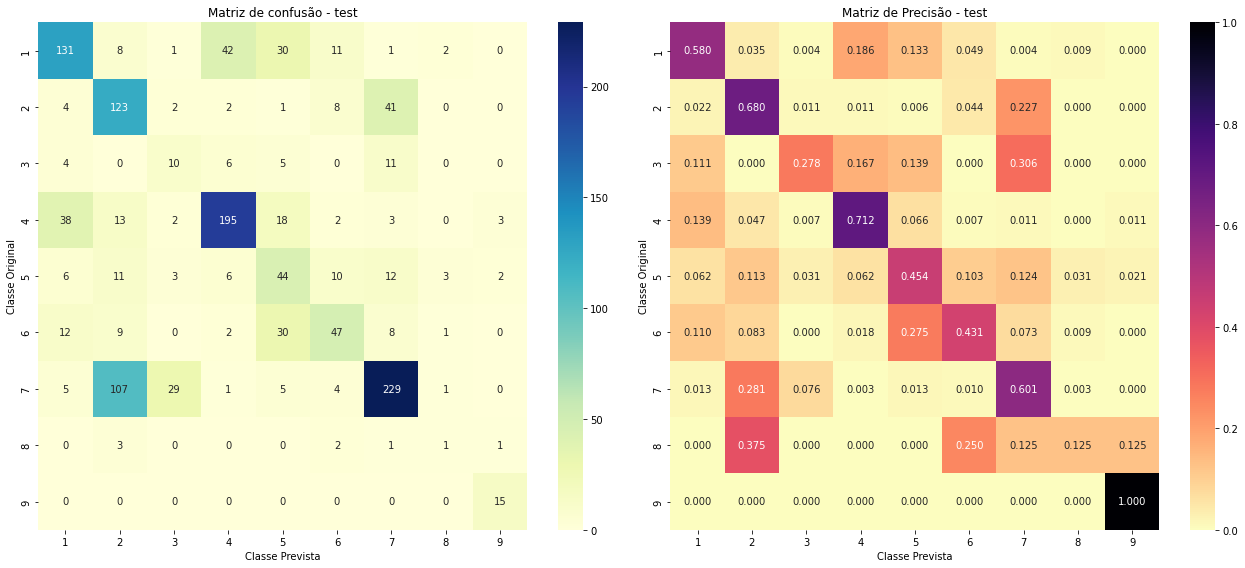

In [403]:
cm_response.predict_all()
cm_response.plot()
cm_response.save_model("KNN")

### 7.3 - Stochastic Gradient Descent Classifier

In [404]:
cm_onehot.new_model(SGDClassifier(class_weight='balanced', penalty='l2', loss='log', random_state=42,n_jobs=-1))
alpha = [10**x for x in range(-6,0)]
cm_onehot.set_best_param("alpha",alpha)
cm_onehot.fit()

alpha = 1e-06 ------> Perda Logarítmica = 1.3888       Accuracy = 0.5427

alpha = 1e-05 ------> Perda Logarítmica = 1.3972       Accuracy = 0.5477

alpha = 0.0001 ------> Perda Logarítmica = 1.2465       Accuracy = 0.603

alpha = 0.001 ------> Perda Logarítmica = 1.2254       Accuracy = 0.6231

alpha = 0.01 ------> Perda Logarítmica = 1.2962       Accuracy = 0.5879

alpha = 0.1 ------> Perda Logarítmica = 1.7015       Accuracy = 0.4573

__________________________________________________

Melhor alpha para a métrica 'log_loss'= 0.001
	Perda Logarítmica = 1.2254
	Acurácia = 0.6231


Previsões do Modelo em train:
	Perda Logarítmica = 0.5366
	Acurácia = 0.9106
Previsões do Modelo em test:
	Perda Logarítmica = 1.0272
	Acurácia = 0.676
Previsões do Modelo em val:
	Perda Logarítmica = 1.2254
	Acurácia = 0.6231


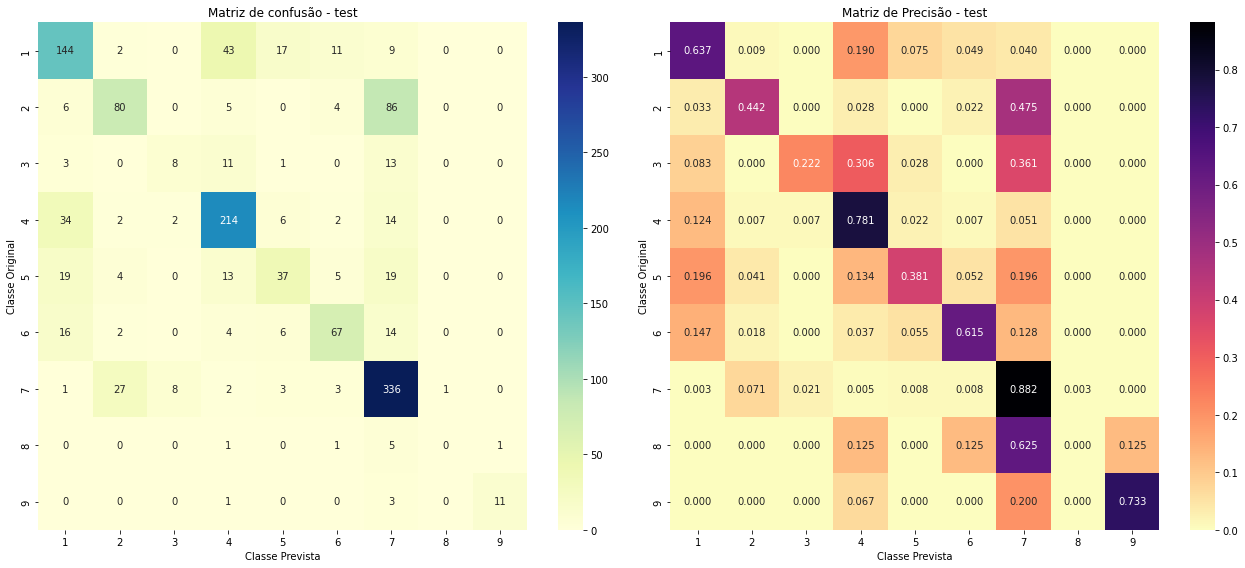

In [405]:
cm_onehot.predict_all()
cm_onehot.plot()
cm_onehot.save_model("SGD v1")

In [406]:
cm_onehot.new_model(SGDClassifier(class_weight='balanced', penalty='l2', loss='hinge', random_state=42,n_jobs=-1))
alpha = [10**x for x in range(-6,0)]
cm_onehot.set_best_param("alpha",alpha)
cm_onehot.fit()

alpha = 1e-06 ------> Perda Logarítmica = 1.3872       Accuracy = 0.5477

alpha = 1e-05 ------> Perda Logarítmica = 1.3633       Accuracy = 0.5477

alpha = 0.0001 ------> Perda Logarítmica = 1.3286       Accuracy = 0.5377

alpha = 0.001 ------> Perda Logarítmica = 1.2415       Accuracy = 0.598

alpha = 0.01 ------> Perda Logarítmica = 1.2157       Accuracy = 0.608

alpha = 0.1 ------> Perda Logarítmica = 1.4604       Accuracy = 0.5025

__________________________________________________

Melhor alpha para a métrica 'log_loss'= 0.01
	Perda Logarítmica = 1.2157
	Acurácia = 0.608


Previsões do Modelo em train:
	Perda Logarítmica = 0.7215
	Acurácia = 0.8888
Previsões do Modelo em test:
	Perda Logarítmica = 1.1595
	Acurácia = 0.6616
Previsões do Modelo em val:
	Perda Logarítmica = 1.2157
	Acurácia = 0.608


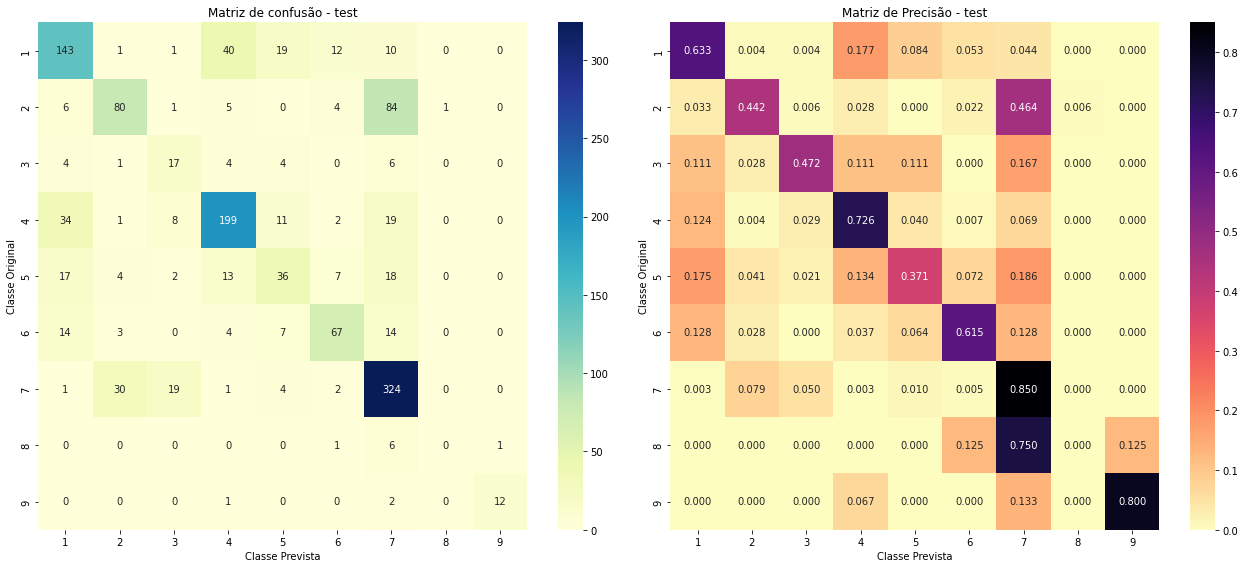

In [407]:
cm_onehot.predict_all()
cm_onehot.plot()
cm_onehot.save_model("SGD v2")

### 7.4 - Regressão Logística

Previsões do Modelo em train:
	Perda Logarítmica = 0.571
	Acurácia = 0.933
Previsões do Modelo em test:
	Perda Logarítmica = 1.025
	Acurácia = 0.6662
Previsões do Modelo em val:
	Perda Logarítmica = 1.0057
	Acurácia = 0.6131


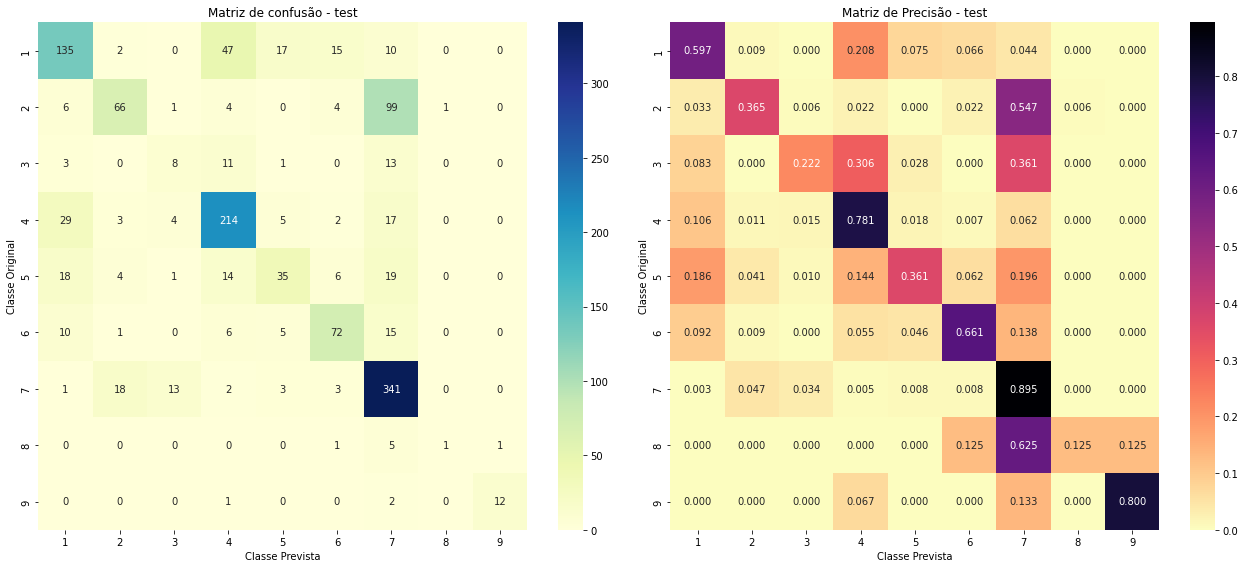

In [408]:
cm_onehot.new_model(LogisticRegression(class_weight='balanced'))
cm_onehot.fit()
cm_onehot.predict_all()
cm_onehot.plot()
cm_onehot.save_model("LR v1")

Previsões do Modelo em train:
	Perda Logarítmica = 1.1181
	Acurácia = 0.6486
Previsões do Modelo em test:
	Perda Logarítmica = 1.206
	Acurácia = 0.5998
Previsões do Modelo em val:
	Perda Logarítmica = 1.1917
	Acurácia = 0.603


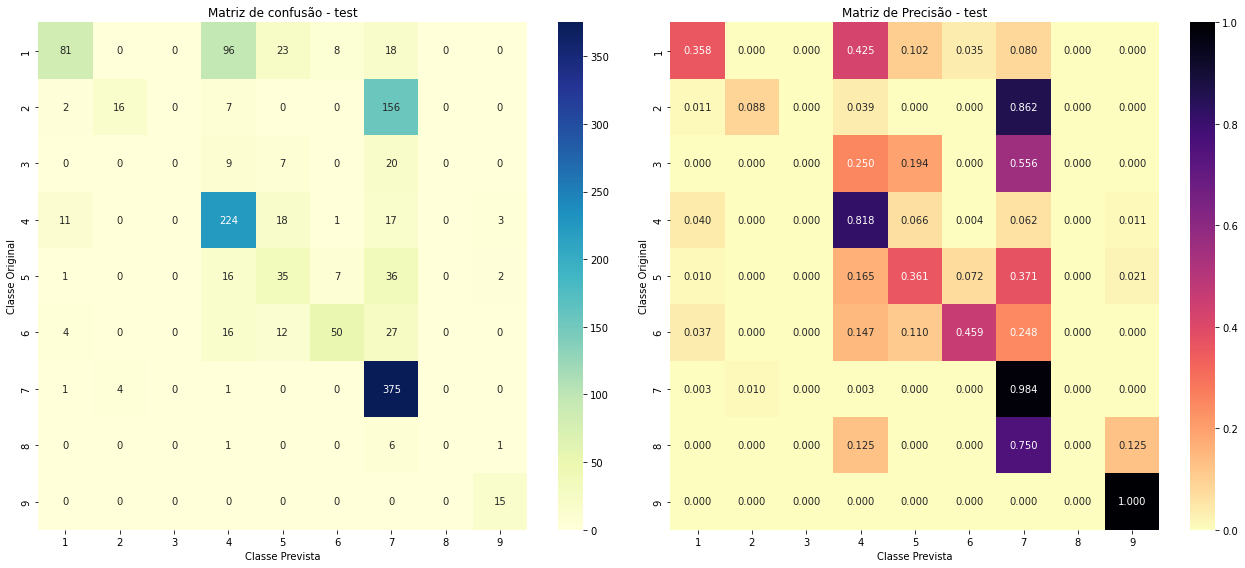

In [409]:
cm_response.new_model(LogisticRegression(class_weight='balanced'))
cm_response.fit()
cm_response.predict_all()
cm_response.plot()
cm_response.save_model("LR v2")

### 7.5 - Support Vector Machines (SVM)

Previsões do Modelo em train:
	Perda Logarítmica = 0.862
	Acurácia = 0.7279
Previsões do Modelo em test:
	Perda Logarítmica = 1.1703
	Acurácia = 0.5901
Previsões do Modelo em val:
	Perda Logarítmica = 1.226
	Acurácia = 0.5729


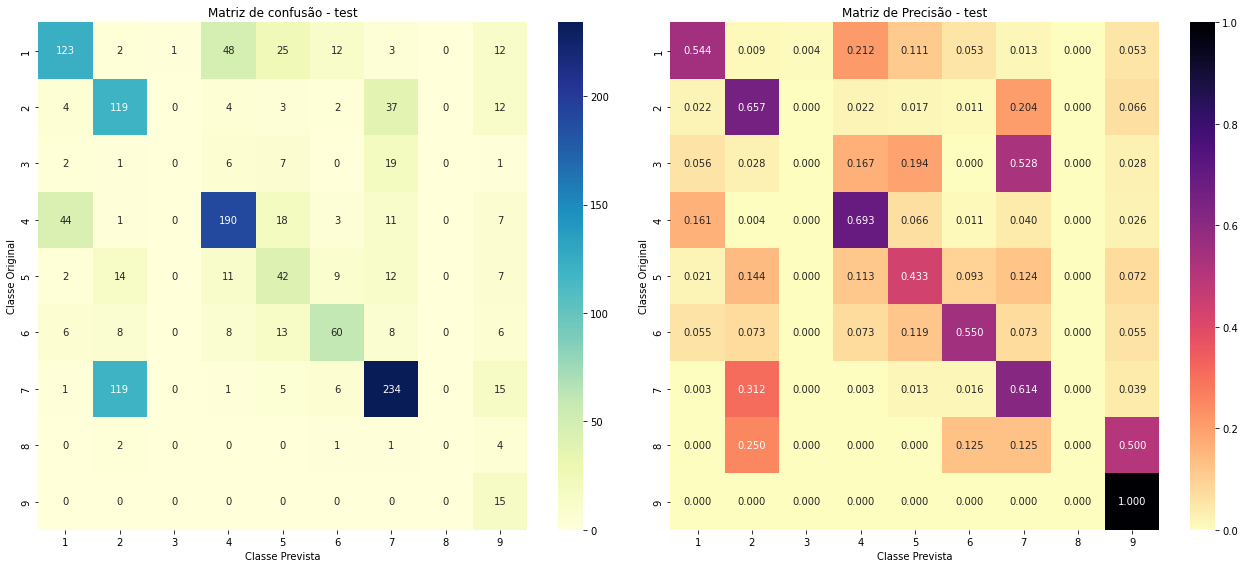

In [410]:
cm_response.new_model(SVC(class_weight='balanced'))
cm_response.fit()
cm_response.predict_all()
cm_response.plot()
cm_response.save_model("SVC v1")

### 7.6 - Random Forest (RF)

In [411]:
cm_response.new_model(RandomForestClassifier(class_weight='balanced',criterion='gini', max_depth=6, random_state=42, n_jobs=-1))
alpha = [100*i for i in range(1,10)]
cm_response.set_best_param("n_estimators",alpha)
cm_response.fit()

n_estimators = 100 ------> Perda Logarítmica = 1.3085       Accuracy = 0.5879

n_estimators = 200 ------> Perda Logarítmica = 1.2814       Accuracy = 0.6332

n_estimators = 300 ------> Perda Logarítmica = 1.3007       Accuracy = 0.6231

n_estimators = 400 ------> Perda Logarítmica = 1.3083       Accuracy = 0.6231

n_estimators = 500 ------> Perda Logarítmica = 1.3       Accuracy = 0.6131

n_estimators = 600 ------> Perda Logarítmica = 1.2973       Accuracy = 0.608

n_estimators = 700 ------> Perda Logarítmica = 1.2966       Accuracy = 0.608

n_estimators = 800 ------> Perda Logarítmica = 1.2899       Accuracy = 0.608

n_estimators = 900 ------> Perda Logarítmica = 1.2918       Accuracy = 0.603

__________________________________________________

Melhor n_estimators para a métrica 'log_loss'= 200
	Perda Logarítmica = 1.2814
	Acurácia = 0.6332


Previsões do Modelo em train:
	Perda Logarítmica = 0.053
	Acurácia = 0.9927
Previsões do Modelo em test:
	Perda Logarítmica = 1.3426
	Acurácia = 0.6096
Previsões do Modelo em val:
	Perda Logarítmica = 1.2814
	Acurácia = 0.6332


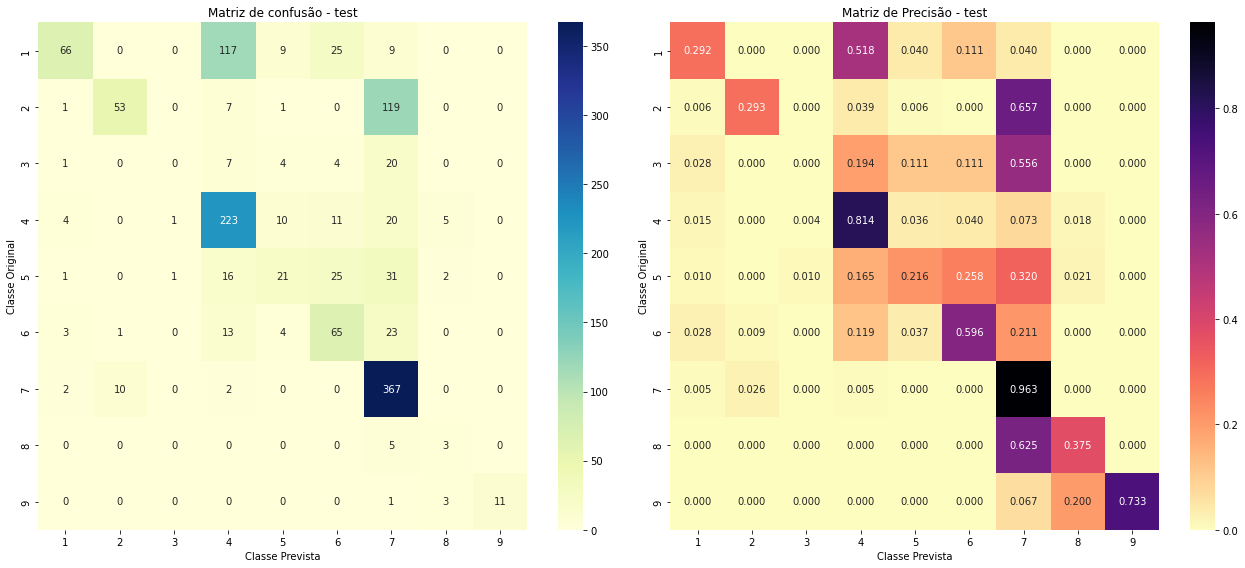

In [412]:
cm_response.predict_all()
cm_response.plot()
cm_response.save_model("RF v1")

In [413]:
cm_onehot.new_model(RandomForestClassifier(criterion='gini', max_depth=9, random_state=42, n_jobs=-1))
alpha = [i for i in range(3,30,3)]
cm_onehot.set_best_param("n_estimators",alpha)
cm_onehot.fit()

n_estimators = 3 ------> Perda Logarítmica = 1.5744       Accuracy = 0.4271

n_estimators = 6 ------> Perda Logarítmica = 1.4334       Accuracy = 0.5025

n_estimators = 9 ------> Perda Logarítmica = 1.3698       Accuracy = 0.5528

n_estimators = 12 ------> Perda Logarítmica = 1.3431       Accuracy = 0.5477

n_estimators = 15 ------> Perda Logarítmica = 1.322       Accuracy = 0.5729

n_estimators = 18 ------> Perda Logarítmica = 1.3097       Accuracy = 0.5578

n_estimators = 21 ------> Perda Logarítmica = 1.3049       Accuracy = 0.5578

n_estimators = 24 ------> Perda Logarítmica = 1.2943       Accuracy = 0.5327

n_estimators = 27 ------> Perda Logarítmica = 1.2782       Accuracy = 0.5528

__________________________________________________

Melhor n_estimators para a métrica 'log_loss'= 27
	Perda Logarítmica = 1.2782
	Acurácia = 0.5528


Previsões do Modelo em train:
	Perda Logarítmica = 0.8086
	Acurácia = 0.7927
Previsões do Modelo em test:
	Perda Logarítmica = 1.148
	Acurácia = 0.6398
Previsões do Modelo em val:
	Perda Logarítmica = 1.2782
	Acurácia = 0.5528


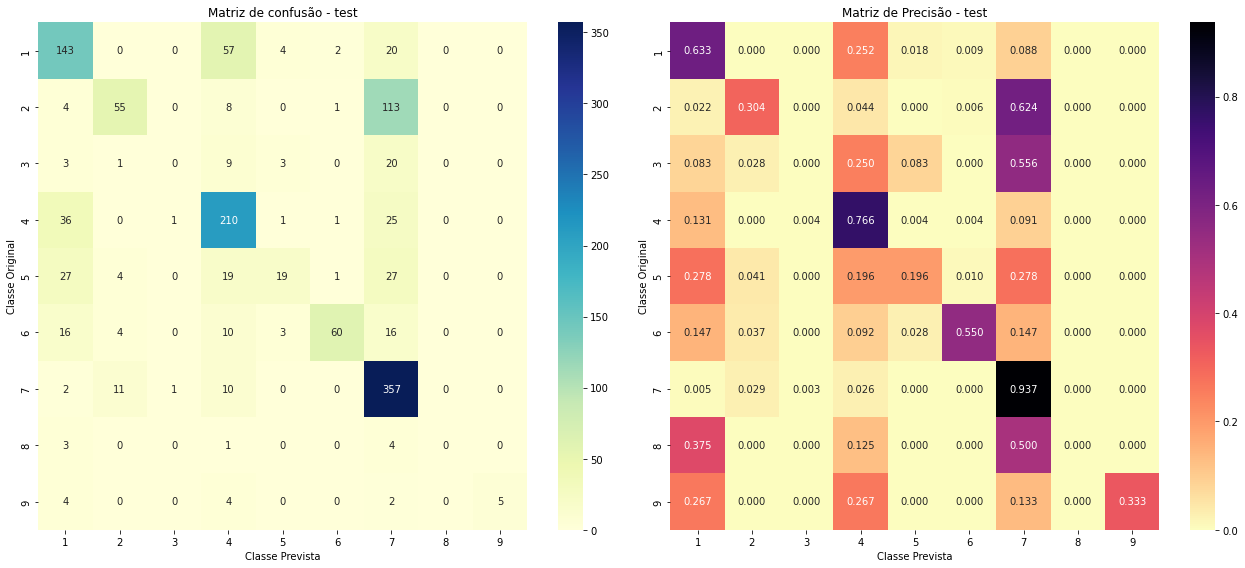

In [414]:
cm_onehot.predict_all()
cm_onehot.plot()
cm_onehot.save_model("RF v2")

### 7.7 - Multi-layer Perceptron (MLP)

Previsões do Modelo em train:
	Perda Logarítmica = 0.9536
	Acurácia = 0.686
Previsões do Modelo em test:
	Perda Logarítmica = 1.1301
	Acurácia = 0.6119
Previsões do Modelo em val:
	Perda Logarítmica = 1.1696
	Acurácia = 0.5879


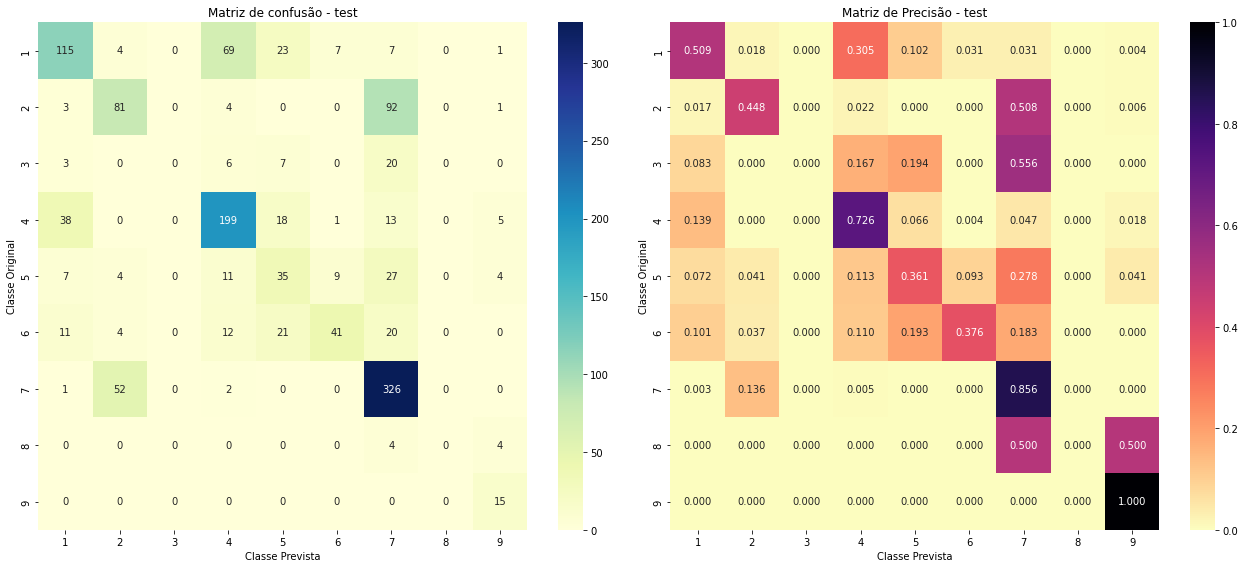

In [415]:
cm_response.new_model(MLPClassifier())
cm_response.fit()
cm_response.predict_all()
cm_response.plot()
cm_response.save_model("MLP")

## 8 - Análise dos Resultados

In [416]:
# coleta dos resultados dos modelos para plotagem

# acurácia de cada modelo
models_accs = [models_dict[i][0] for i in models_dict.keys()]

# acurácia de cada modelo em cada classe
models_classes_accs = [list(models_dict[i][1].values()) for i in models_dict.keys()]

# acurácia média por classe
models_accs_mean = [np.mean([models_classes_accs[i][j] for i in range(len(models_classes_accs))]) for j in range(len(models_classes_accs[0]))]

# perda logarítmica de cada modelo
models_log_losses = [models_dict[i][2] for i in models_dict.keys()]

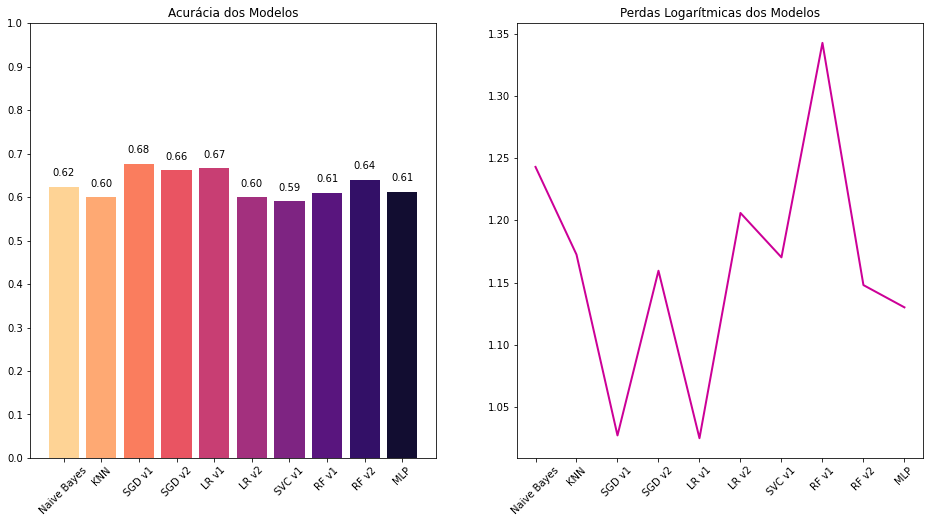

In [420]:
# plotagem da acurácia e da perda logarítmica de cada modelo
colors = sns.color_palette("magma_r", len(models_dict.keys()))
fig,ax = plt.subplots(1,2,figsize=(16,8))
bars = ax[0].bar(list(models_dict.keys()),models_accs,color = colors)
for bar in bars:
    yval = bar.get_height()
    ax[0].text(bar.get_x() + bar.get_width() / 2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')
ax[0].set_ylim(0,1)
ax[0].set_yticks(np.arange(0, 1.1, 0.1))
ax[0].set_xticklabels(list(models_dict.keys()),rotation=45)
ax[0].set_title("Acurácia dos Modelos")
ax[1].plot(list(models_dict.keys()),models_log_losses,color = '#cc0097',linewidth=2)
ax[1].set_xticklabels(list(models_dict.keys()),rotation=45)
ax[1].set_title("Perdas Logarítmicas dos Modelos")

# salvar imagem
plt.savefig('./imgs/resultados_1.png', dpi=300, bbox_inches='tight',facecolor='white')
plt.show()

Os gráficos acima apresentam os resultados do treinamento dos 10 modelos aplicados aos dados de teste, oferecendo uma visão clara do desempenho de cada um.

Ao analisar esses resultados, fica evidente que o modelo "SGD v1" teve o melhor desempenho. Ele se destacou ao atingir a maior acurácia, de 0,68, e também por apresentar a menor perda logarítmica em comparação aos demais modelos. Esses indicadores demonstram que o "SGD v1" foi mais eficaz tanto em prever corretamente quanto em minimizar os erros ao longo do processo.

Esses resultados reforçam a importância de ajustar cuidadosamente os hiperparâmetros e selecionar a estratégia adequada para otimizar o desempenho dos modelos.

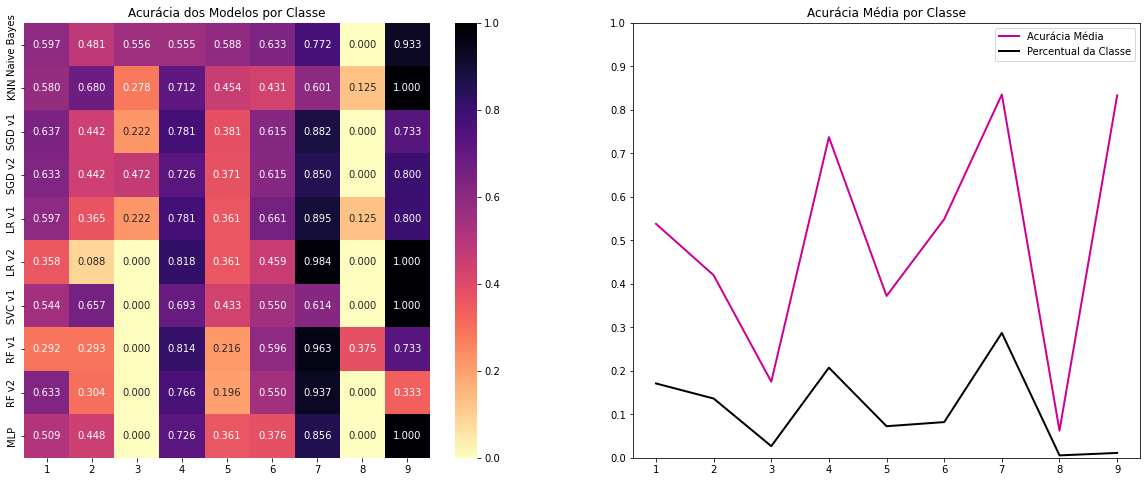

In [418]:
# plotagem da acurácia dos modelos por classe e da acurácia média por classe
fig,ax = plt.subplots(1,2,figsize=(20,8))

sns.heatmap(np.array(models_classes_accs),annot=True,  cmap="magma_r", fmt=".3f", xticklabels=list(range(1,10)), yticklabels=list(models_dict.keys()),ax =ax[0])
ax[0].set_title("Acurácia dos Modelos por Classe")

ax[1].plot(list(range(1,10)),models_accs_mean,color = '#cc0097', label = "Acurácia Média",linewidth=2)
ax[1].plot(list(range(1,10)),train_percent,color = 'k', label = "Percentual da Classe",linewidth=2)
ax[1].set_title("Acurácia Média por Classe")
ax[1].legend()
ax[1].set_ylim(0,1)
ax[1].set_yticks(np.arange(0, 1.1, 0.1))
plt.savefig('./imgs/resultados_2.png', dpi=300, bbox_inches='tight',facecolor='white')
plt.show()

Desde a fase inicial de análise exploratória dos dados, já era possível supor o desafio de construir modelos eficientes, dado o desequilíbrio na proporção de amostras entre as diferentes classes. Essa hipótese se confirmou ao analisarmos os gráficos apresentados.

- No gráfico de "Acurácia dos Modelos por Classe", ao observarmos coluna por coluna, ou seja, classe por classe, notamos uma certa semelhança nas tonalidades. Isso indica que a performance dos modelos em termos de acurácia foi relativamente consistente dentro de cada classe, apesar do desequilíbrio entre as proporções das amostras.

- Já no gráfico de "Acurácia Média por Classe", podemos observar com mais clareza a relação entre a proporção de dados em cada classe e a acurácia média dos modelos. Essa análise reforça a ideia de que classes com menor representação tendem a ter uma acurácia inferior, o que destaca o impacto do desequilíbrio nos dados sobre o desempenho dos modelos.


## 9 - Conclusão



Este projeto foi um grande desafio, o que para mim é uma oportunidade de crescimento. Nele, pude aplicar os conhecimentos adquiridos no curso de Machine Learning da Data Science Academy, desenvolvendo soluções próprias com base no meu arsenal teórico. A experiência também me levou a explorar outros códigos disponíveis no Kaggle e a consultar a documentação das bibliotecas Python, o que tornou o processo ainda mais enriquecedor.

Iniciei o projeto com o objetivo de construir um modelo com 70% de acurácia, uma meta que não foi alcançada desta vez. No entanto, o aprendizado adquirido ao longo do percurso foi inestimável, e vejo este projeto como uma excelente demonstração das minhas habilidades para recrutadores, professores e entusiastas da ciência de dados. Planejo continuar meus estudos na área e, futuramente, revisitar e aprimorar este projeto.

Agradeço por ler e acompanhar minha jornada!